In [1]:
import warnings
warnings.filterwarnings('ignore')

TARGET = 'Fire'
DISCOVERY_TIMEOUT_SECONDS=2800
ESTIMATION_TIMEOUT_SECONDS=1800
REFUTATION_GLOBAL_TIMEOUT_SECONDS=1800
REFUTATION_MODEL_TIMEOUT_SECONDS=240

# Dataset and Knowledge settings

In [2]:
import pandas as pd

df = pd.read_csv('./resources/algerian_forest_fires/data.csv')
df['Region'] = df['Region'].astype(float)
df['day'] = df['day'].astype(float)
df['month'] = df['month'].astype(float)
df['year'] = df['year'].astype(float)
df['Temperature'] = df['Temperature'].astype(float)
df['RH'] = df['RH'].astype(float)
df['Ws'] = df['Ws'].astype(float)
df['Fire'] = df['Fire'].astype(float)
df

,Region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire
0,0.0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,0.0,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,0.0,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,0.0,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,0.0,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1.0,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,1.0,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0
241,1.0,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0
242,1.0,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0


In [3]:
display(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       244 non-null    float64
 1   day          244 non-null    float64
 2   month        244 non-null    float64
 3   year         244 non-null    float64
 4   Temperature  244 non-null    float64
 5   RH           244 non-null    float64
 6   Ws           244 non-null    float64
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    float64
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    float64
 14  Fire         244 non-null    float64
dtypes: float64(15)
memory usage: 28.7 KB


None

,Region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire
count,244.000000,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,0.500000,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.565574
std,0.501028,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.496700
min,0.000000,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,0.000000,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,0.500000,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,1.000000
75%,1.000000,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,1.000000,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [4]:
from causal_nest.knowledge import parse_knowledge_file

knowledge = parse_knowledge_file('./resources/airfoil_self_noise/knowledge.txt')
knowledge

Knowledge(required_edges=[], forbidden_edges=[('Frequency', 'Attack'), ('Velocity', 'Attack'), ('Pressure', 'Displacement'), ('Pressure', 'Attack'), ('Attack', 'Chord'), ('Displacement', 'Chord'), ('Displacement', 'Velocity'), ('Frequency', 'Velocity'), ('Chord', 'Attack'), ('Chord', 'Velocity'), ('Pressure', 'Frequency'), ('Velocity', 'Chord'), ('Pressure', 'Velocity'), ('Frequency', 'Chord'), ('Pressure', 'Chord'), ('Displacement', 'Attack'), ('Attack', 'Velocity')])

In [5]:
from causal_nest.dataset import MissingDataHandlingMethod, Dataset, handle_missing_data, FeatureTypeMap, FeatureType, estimate_feature_importances

feature_mapping = [FeatureTypeMap(feature=c, type=FeatureType.CONTINUOUS) for c in df.drop(TARGET, axis=1).columns]

dataset = Dataset(data=df, target=TARGET, feature_mapping=feature_mapping)
dataset = handle_missing_data(dataset, MissingDataHandlingMethod.FORWARD_FILL)
dataset = estimate_feature_importances(dataset)
dataset

Dataset(data=     Region   day  month    year  Temperature    RH    Ws  Rain  FFMC   DMC  \
0       0.0   1.0    6.0  2012.0         29.0  57.0  18.0   0.0  65.7   3.4   
1       0.0   2.0    6.0  2012.0         29.0  61.0  13.0   1.3  64.4   4.1   
2       0.0   3.0    6.0  2012.0         26.0  82.0  22.0  13.1  47.1   2.5   
3       0.0   4.0    6.0  2012.0         25.0  89.0  13.0   2.5  28.6   1.3   
4       0.0   5.0    6.0  2012.0         27.0  77.0  16.0   0.0  64.8   3.0   
..      ...   ...    ...     ...          ...   ...   ...   ...   ...   ...   
239     1.0  26.0    9.0  2012.0         30.0  65.0  14.0   0.0  85.4  16.0   
240     1.0  27.0    9.0  2012.0         28.0  87.0  15.0   4.4  41.1   6.5   
241     1.0  28.0    9.0  2012.0         27.0  87.0  29.0   0.5  45.9   3.5   
242     1.0  29.0    9.0  2012.0         24.0  54.0  18.0   0.1  79.7   4.3   
243     1.0  30.0    9.0  2012.0         24.0  64.0  15.0   0.2  67.3   3.8   

       DC  ISI   BUI  FWI  Fire  
0   

In [6]:
from causal_nest.problem import Problem

problem = Problem(dataset=dataset, description='Algerian Forest Fires', knowledge=knowledge)
problem

Problem(dataset=Dataset(data=     Region   day  month    year  Temperature    RH    Ws  Rain  FFMC   DMC  \
0       0.0   1.0    6.0  2012.0         29.0  57.0  18.0   0.0  65.7   3.4   
1       0.0   2.0    6.0  2012.0         29.0  61.0  13.0   1.3  64.4   4.1   
2       0.0   3.0    6.0  2012.0         26.0  82.0  22.0  13.1  47.1   2.5   
3       0.0   4.0    6.0  2012.0         25.0  89.0  13.0   2.5  28.6   1.3   
4       0.0   5.0    6.0  2012.0         27.0  77.0  16.0   0.0  64.8   3.0   
..      ...   ...    ...     ...          ...   ...   ...   ...   ...   ...   
239     1.0  26.0    9.0  2012.0         30.0  65.0  14.0   0.0  85.4  16.0   
240     1.0  27.0    9.0  2012.0         28.0  87.0  15.0   4.4  41.1   6.5   
241     1.0  28.0    9.0  2012.0         27.0  87.0  29.0   0.5  45.9   3.5   
242     1.0  29.0    9.0  2012.0         24.0  54.0  18.0   0.1  79.7   4.3   
243     1.0  30.0    9.0  2012.0         24.0  64.0  15.0   0.2  67.3   3.8   

       DC  ISI   BUI  

## Checking the Feature infered importance

In [7]:
problem.dataset.feature_mapping

[FeatureTypeMap(feature='FFMC', type=<FeatureType.CONTINUOUS: 3>, importance=0.5379167186128794),
 FeatureTypeMap(feature='ISI', type=<FeatureType.CONTINUOUS: 3>, importance=0.44128979020720094),
 FeatureTypeMap(feature='FWI', type=<FeatureType.CONTINUOUS: 3>, importance=0.00394699006861818),
 FeatureTypeMap(feature='RH', type=<FeatureType.CONTINUOUS: 3>, importance=0.0032691534678790522),
 FeatureTypeMap(feature='Temperature', type=<FeatureType.CONTINUOUS: 3>, importance=0.0030751273730109706),
 FeatureTypeMap(feature='day', type=<FeatureType.CONTINUOUS: 3>, importance=0.0026767340762124925),
 FeatureTypeMap(feature='month', type=<FeatureType.CONTINUOUS: 3>, importance=0.0019597938012055663),
 FeatureTypeMap(feature='BUI', type=<FeatureType.CONTINUOUS: 3>, importance=0.0018265103498885792),
 FeatureTypeMap(feature='DC', type=<FeatureType.CONTINUOUS: 3>, importance=0.0017856673071988773),
 FeatureTypeMap(feature='DMC', type=<FeatureType.CONTINUOUS: 3>, importance=0.0009106138235752696)

# Causal Discovery

In [8]:
from causal_nest.discovery import applyable_models

models = applyable_models(problem)
models

[causal_nest.discovery_models.pc.PC,
 causal_nest.discovery_models.gs.GS,
 causal_nest.discovery_models.ccdr.CCDR,
 causal_nest.discovery_models.iamb.IAMB,
 causal_nest.discovery_models.sam.SAM,
 causal_nest.discovery_models.bes.BES,
 causal_nest.discovery_models.grasp.GRASP,
 causal_nest.discovery_models.cgnn.CGNN]

In [9]:
from causal_nest.discovery import discover_with_all_models

problem = discover_with_all_models(problem, max_seconds_model=DISCOVERY_TIMEOUT_SECONDS)
problem.discovery_results

 30%|███       | 301/1000 [03:07<07:23,  1.58it/s, disc=-.381, gen=-.124, regul_loss=2.5, tot=-12.8]  

Function raised Singular matrix
Traceback (most recent call last):
  File "/root/.cache/pypoetry/virtualenvs/causal-nest-9TtSrW0h-py3.9/lib/python3.9/site-packages/pebble/common.py", line 174, in process_execute
    return function(*args, **kwargs)
  File "/app/causal_nest/discovery.py", line 115, in _run_discover_with_model_task
    return discover_with_model(*args)
  File "/app/causal_nest/discovery.py", line 70, in discover_with_model
    output_graph = m.create_graph_from_data(problem.dataset)
  File "/app/causal_nest/discovery_models/grasp.py", line 22, in create_graph_from_data
    g = grasp(fod.to_numpy())
  File "/root/.cache/pypoetry/virtualenvs/causal-nest-9TtSrW0h-py3.9/lib/python3.9/site-packages/causallearn/search/PermutationBased/GRaSP.py", line 203, in grasp
    grow(y, y_parents, candidates, score)
  File "/root/.cache/pypoetry/virtualenvs/causal-nest-9TtSrW0h-py3.9/lib/python3.9/site-packages/causallearn/search/PermutationBased/GRaSP.py", line 342, in grow
    current 

{'PC': None,
 'GS': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada5e460>, model='GS', auc_pr=None, shd=None, sid=None, runtime=3.1573997079976834, priority_score=0.0, knowledge_integrity_score=1.0, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=1.0),
 'CCDR': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada5e6d0>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=7.965663986004074, priority_score=0.0, knowledge_integrity_score=1.0, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=1.0),
 'IAMB': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada5e610>, model='IAMB', auc_pr=None, shd=None, sid=None, runtime=3.33520148700336, priority_score=0.0, knowledge_integrity_score=1.0, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=1.0),
 'SAM': None,
 'BES': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7ff

In [10]:
list(sorted(filter(lambda x: x, problem.discovery_results.values()), key=lambda x: x.priority_score, reverse=True))

[DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada5e460>, model='GS', auc_pr=None, shd=None, sid=None, runtime=3.1573997079976834, priority_score=0.0, knowledge_integrity_score=1.0, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=1.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada5e6d0>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=7.965663986004074, priority_score=0.0, knowledge_integrity_score=1.0, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=1.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada5e610>, model='IAMB', auc_pr=None, shd=None, sid=None, runtime=3.33520148700336, priority_score=0.0, knowledge_integrity_score=1.0, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=1.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada5e940>, model='BES', auc_pr=None, shd=None, sid=None

# Causal Estimation

In [11]:
from causal_nest.estimation import estimate_all_effects

problem = estimate_all_effects(problem, verbose=True, max_seconds_model=ESTIMATION_TIMEOUT_SECONDS)
problem.estimation_results

{'GS': [EstimationResult(model='GS', treatment='FFMC', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13743040>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff137430a0>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='GS', treatment='ISI', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13743100>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff13743160>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='GS', treatment='FWI', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff137431c0>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff13743220>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='GS', treatment='RH', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13743280>, estimate=<dowhy.causal_e

In [12]:
for m, er in problem.estimation_results.items():
    print('\n\n\nModel: ', m)
    for r in er:
        print(r.treatment, ': ', r.estimate.value)




Model:  GS
FFMC :  0
ISI :  0
FWI :  0
RH :  0
Temperature :  0
day :  0
month :  0
BUI :  0
DC :  0
DMC :  0
Ws :  0
Rain :  0
Region :  0
year :  0



Model:  CCDR
FFMC :  0.0266792673965619
ISI :  0.04680293327211932
FWI :  0
RH :  0.0102480802662641
Temperature :  -0.0007411686733009848
day :  0
month :  0.0046143164270091575
BUI :  0
DC :  0
DMC :  0
Ws :  0.01129986853440218
Rain :  0.02058684949488876
Region :  0.011816983346702448
year :  0



Model:  IAMB
FFMC :  0
ISI :  0
FWI :  0
RH :  0
Temperature :  0
day :  0
month :  0
BUI :  0
DC :  0
DMC :  0
Ws :  0
Rain :  0
Region :  0
year :  0



Model:  BES
FFMC :  0
ISI :  0
FWI :  0
RH :  0
Temperature :  0
day :  0
month :  0
BUI :  0
DC :  0
DMC :  0
Ws :  0
Rain :  0
Region :  0
year :  0


# Refutation

In [13]:
from causal_nest.refutation import refute_all_results

problem = refute_all_results(problem, max_seconds_global=REFUTATION_GLOBAL_TIMEOUT_SECONDS, max_seconds_model=REFUTATION_MODEL_TIMEOUT_SECONDS)
problem.refutation_results

e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscr

{'GS': [],
 'CCDR': [RefutationResult(treatment='ISI', estimated_effect=0.04680293327211932, p_value=0.94, new_effect=0.00044020502304737194, model='PlaceboPermute', runtime=20.16369033799856, passed=True),
  RefutationResult(treatment='ISI', estimated_effect=0.04680293327211932, p_value=0.96, new_effect=0.046790114799485576, model='RandomCommonCause', runtime=34.96295235300204, passed=True),
  RefutationResult(treatment='ISI', estimated_effect=0.04680293327211932, p_value=0.92, new_effect=0.04658851981380143, model='SubsetRemoval', runtime=51.11256066299393, passed=True),
  RefutationResult(treatment='FFMC', estimated_effect=0.0266792673965619, p_value=0.9, new_effect=-0.00012084031620702041, model='PlaceboPermute', runtime=15.91244725100114, passed=True),
  RefutationResult(treatment='FFMC', estimated_effect=0.0266792673965619, p_value=0.92, new_effect=0.02667420475971511, model='RandomCommonCause', runtime=30.621157049012254, passed=True),
  RefutationResult(treatment='FFMC', estima

# Output Graphs

In [14]:
from causal_nest.result import generate_all_results


graphs = generate_all_results(problem)
graphs

{'PC': None,
 'GS': 'digraph G {\nfontname="Helvetica,Arial,sans-serif";\nnode[style="filled", fontsize=20, penwidth=2.5, fixedsize=true, fontcolor="black", fillcolor="gray", color="black", shape="circle"];\nedge[penwidth=2, minlen=2];\nsplines="polyline";\n   "FFMC"[width=1, height=1, label="FFMC\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "ISI"[width=1, height=1, label="ISI\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "FWI"[width=1, height=1, label="FWI\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "RH"[width=1, height=1, label="RH\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "Temperature"[width=1, height=1, label="Temperature\n0.00", fil

PC
No graph
GS


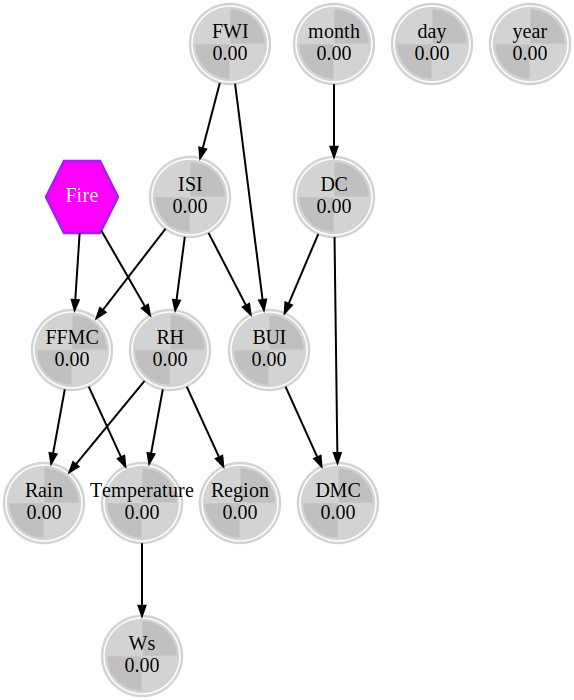

CCDR


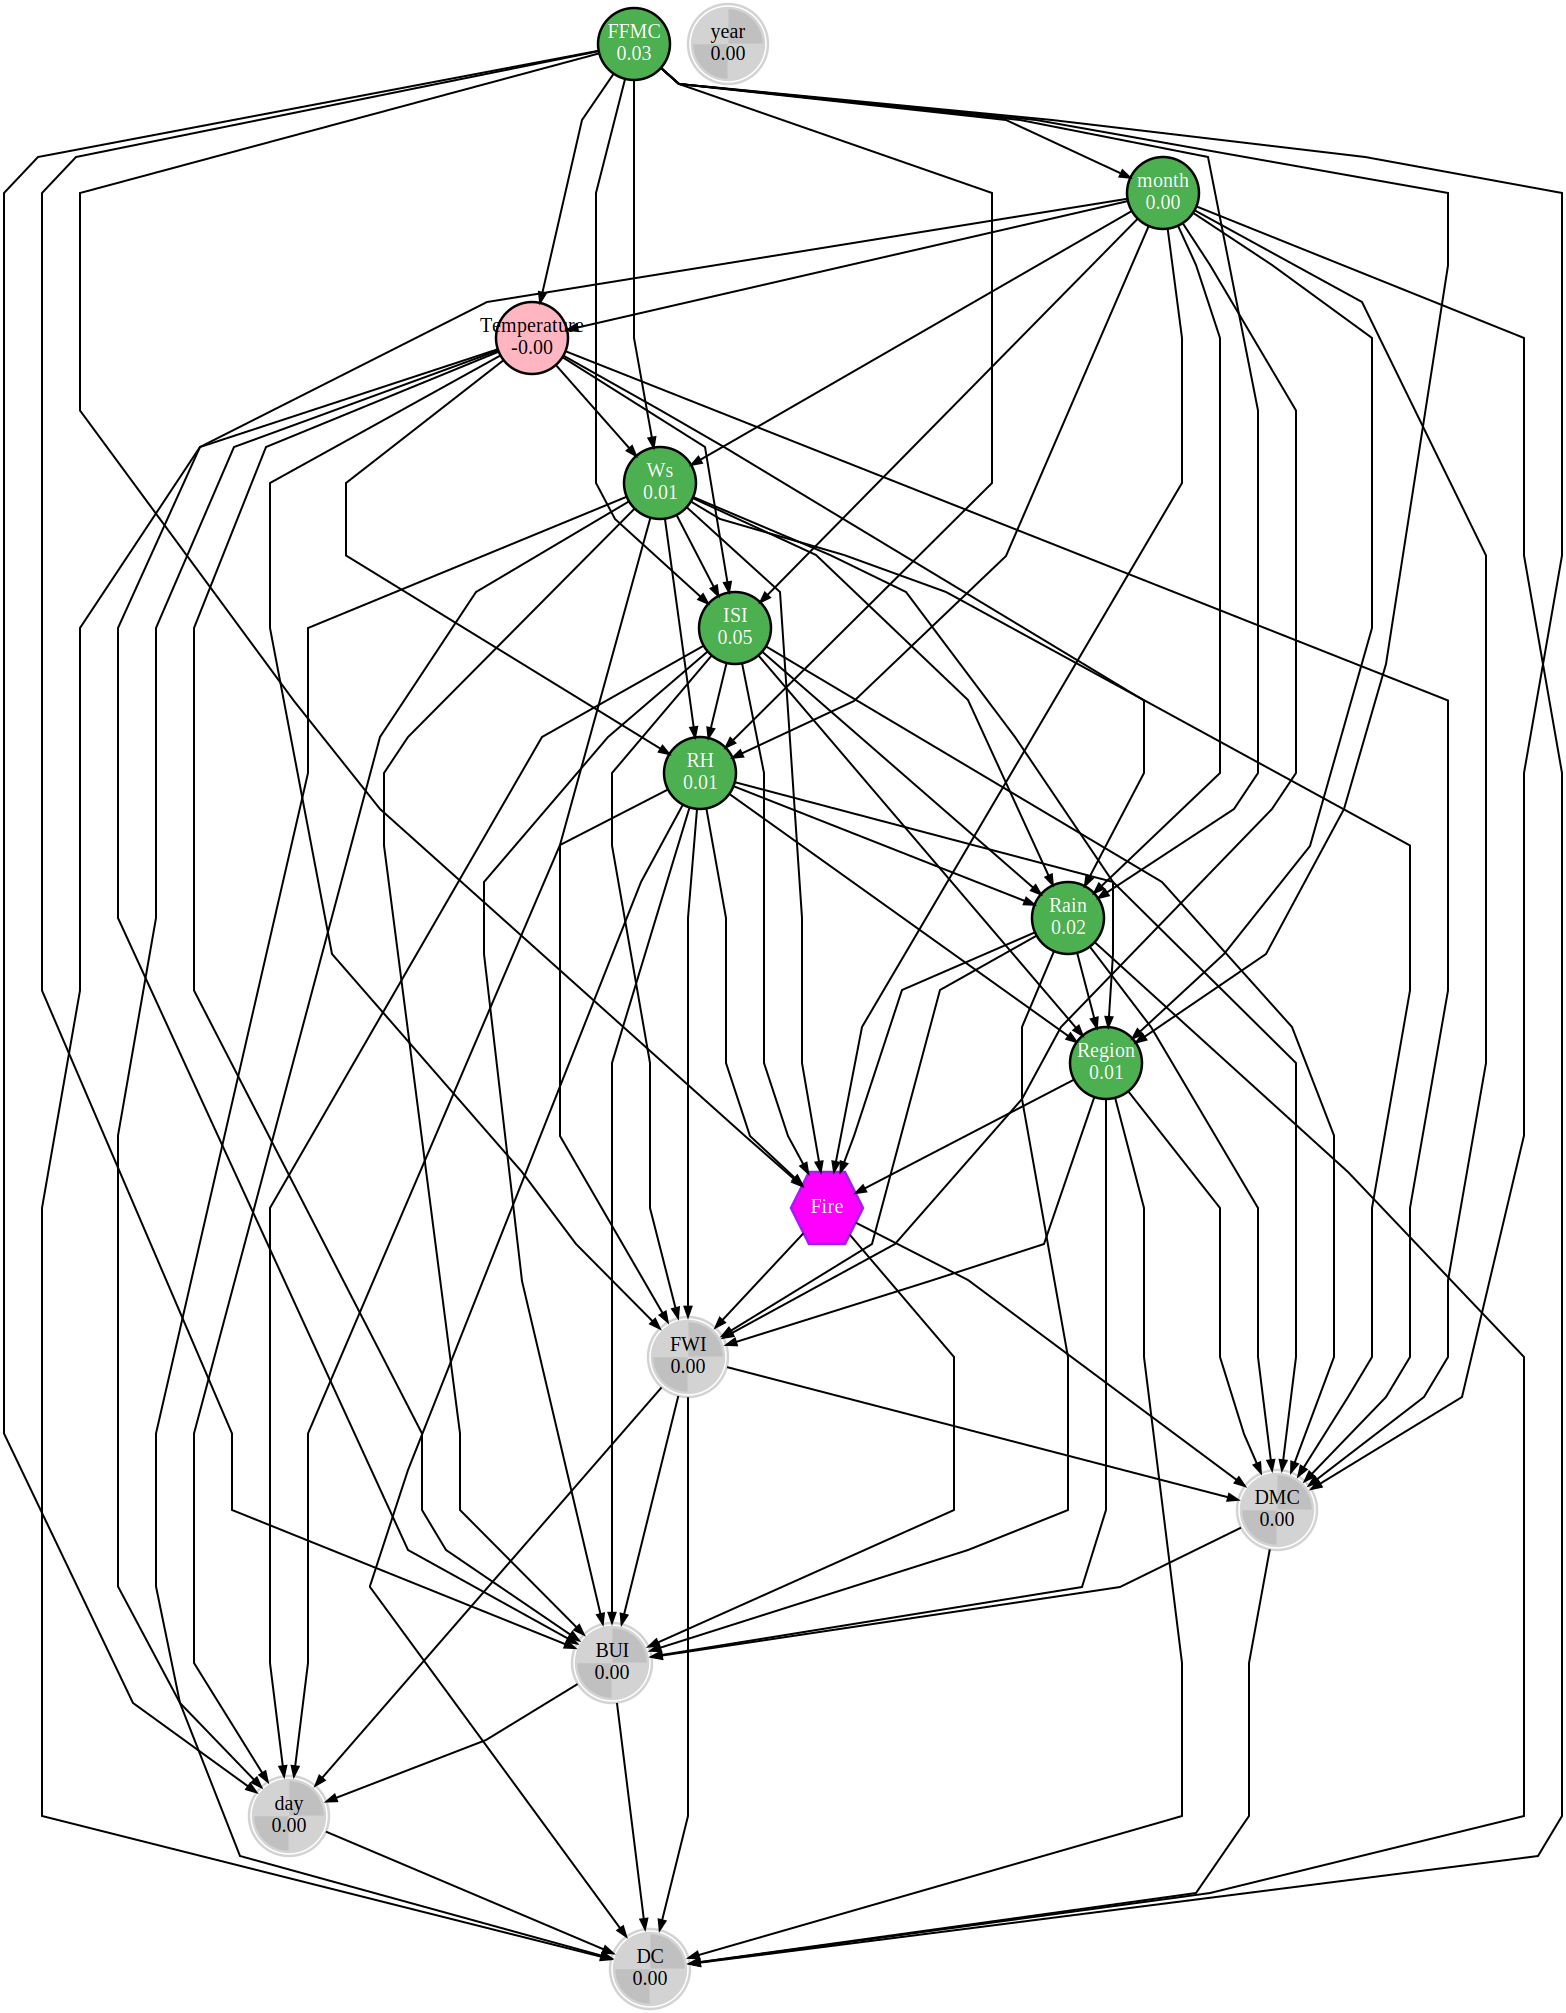

IAMB


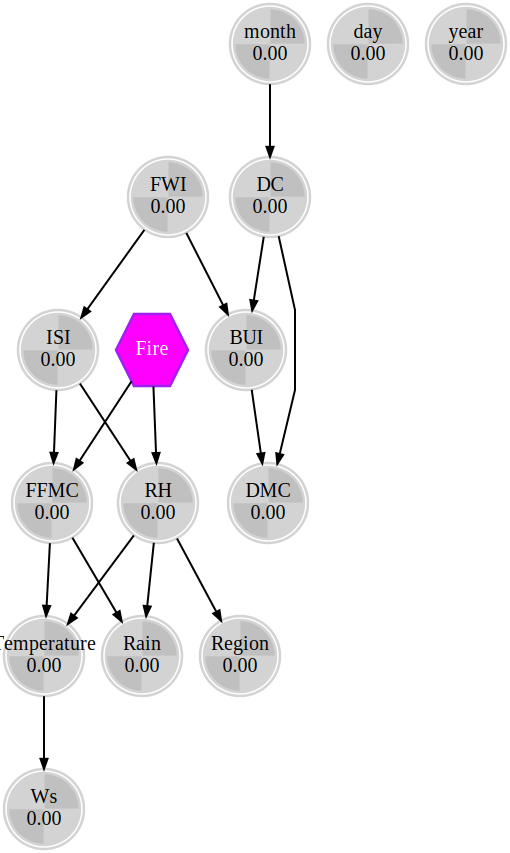

SAM
No graph
BES


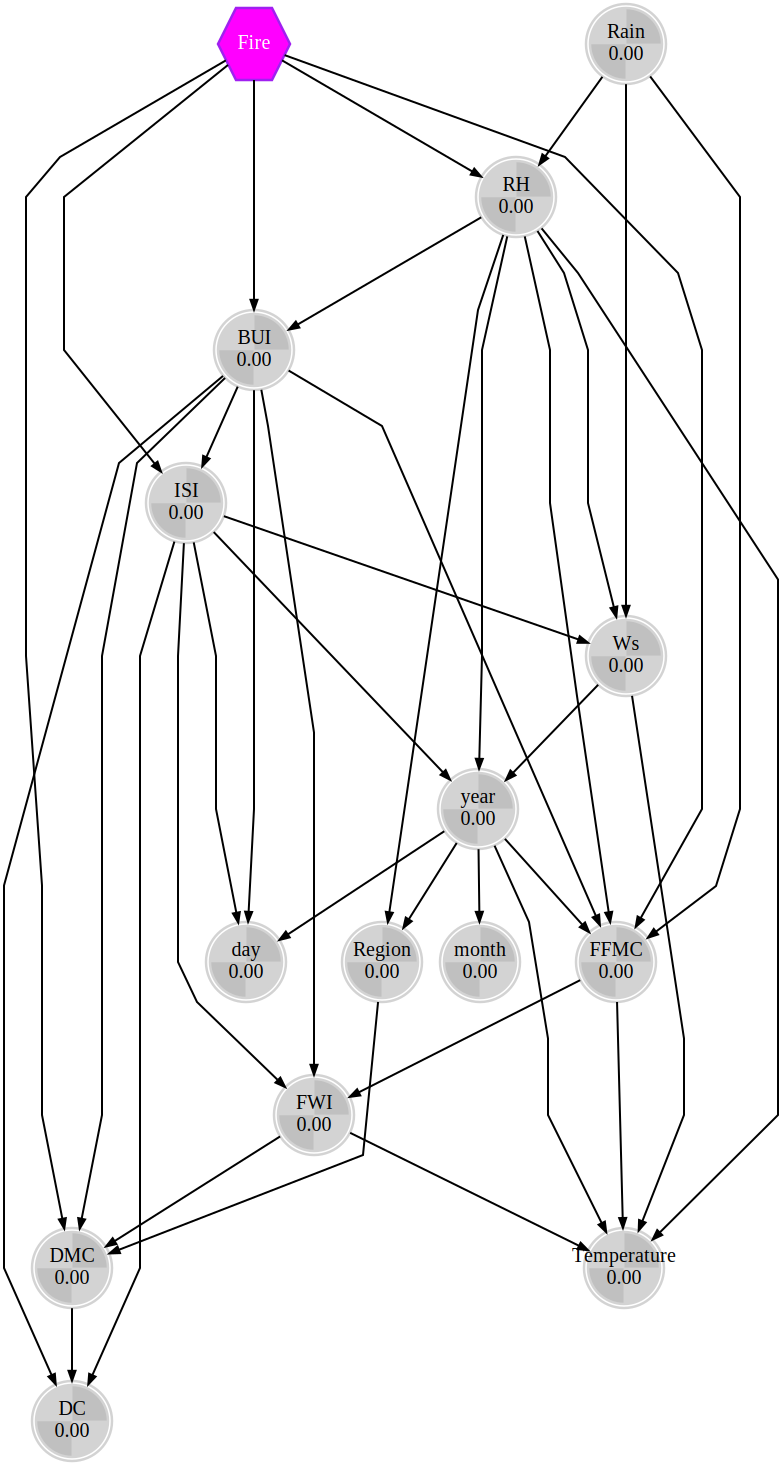

GRASP
No graph
CGNN
No graph


In [15]:
from graphviz import Source

for k, v in graphs.items():
    print(k)

    if v is None: 
        print('No graph')
    else:
        display(Source(v))